# 1.1


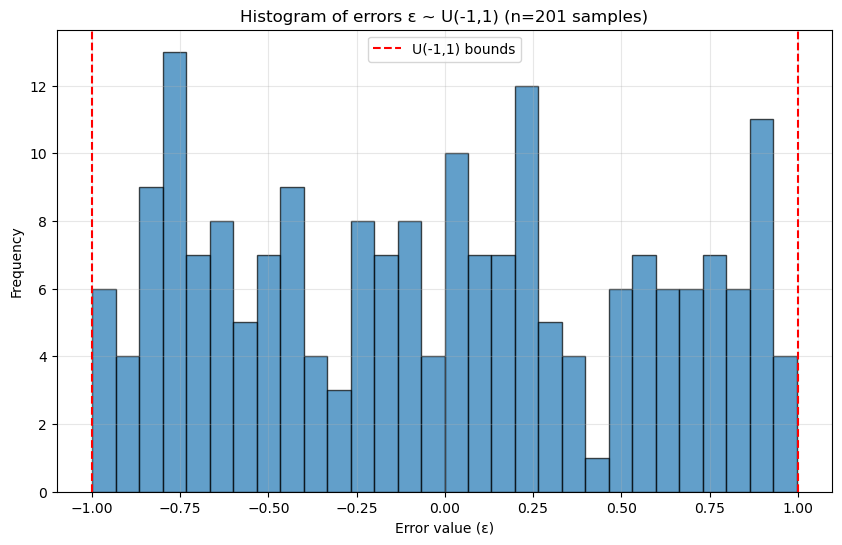

Number of samples: 201
Error mean: -0.0277
Error var: 0.3392
Error min: -0.9989
Error max: 0.9972


In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(23)  
def generate_observations(q, t):
    """Generate observations y = [1, e^t] * q + ε where ε ~ U(-1,1)"""
    X = np.column_stack([np.ones_like(t), np.exp(t)])
    epsilon = np.random.uniform(-1, 1, len(t))
    y = X @ q + epsilon
    return y, epsilon

# Parameters
q = np.array([10, 1])
t = np.arange(0, 10.05, 0.05)#5)
q_true = q
# Generate observations
y, epsilon = generate_observations(q, t)

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(epsilon, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=-1, color='r', linestyle='--', label='U(-1,1) bounds')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Error value (ε)')
plt.ylabel('Frequency')
plt.title(f'Histogram of errors ε ~ U(-1,1) (n={len(t)} samples)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics
print(f"Number of samples: {len(t)}")
print(f"Error mean: {np.mean(epsilon):.4f}")
print(f"Error var: {np.std(epsilon)**2:.4f}")
print(f"Error min: {np.min(epsilon):.4f}")
print(f"Error max: {np.max(epsilon):.4f}")

We observe a plot of random variable errors that follows an approximately uniform distribution, as prescribed/expected. We have 201 uniformly spaced time points from 0 to 10 seconds, and thus, 201 samples of $\epsilon$ drawn from U(−1,1); the histogram of $\epsilon$ shows an approximately flat distribution between −1 and 1 in accordance with the uniform distribution (the spread covers the entire interval [−1,1] as required). The sample mean of the histogram is near 0 (0.0277), the sample variance is close to the theoretical variance of 1/3 ≈ 0.3333 (currently 0.3392). As the number of samples increases (e.g., finer time discretization), the distribution of $\epsilon$ approaches the theoretical mean and variance; for example, when the time step size is 0.001 (10,000 samples), the mean is -0.0092 and the variance is 0.3341, both of which are approaching the theoretical value at a order $1/\sqrt{(n)}$ as per the Central Limit Theorem. Minor random fluctuations are expected due to finite sampling of a uniform distribution, and these are mitagated with more samples.

# 1.2 \& 1.3


In [5]:
from scipy import stats

def compute_estimates(t, y):
    X = np.column_stack([np.ones_like(t), np.exp(t)])
    
    # Least squares estimate
    q_ls = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Predicted values and residuals
    y_pred = X @ q_ls
    residuals = y - y_pred
    
    # Error variance estimate
    n = len(t)
    p = 2  # number of parameters
    sigma2 = np.sum(residuals**2) / (n - p)
    
    # Parameter covariance matrix
    C = sigma2 * np.linalg.inv(X.T @ X)
    
    # Confidence intervals (alpha = 0.05)
    alpha = 0.05
    t_critical = stats.t.ppf(1 - alpha/2, n - p)
    
    ci_q1 = [q_ls[0] - t_critical * np.sqrt(C[0,0]), 
             q_ls[0] + t_critical * np.sqrt(C[0,0])]
    ci_q2 = [q_ls[1] - t_critical * np.sqrt(C[1,1]), 
             q_ls[1] + t_critical * np.sqrt(C[1,1])]
    
    return q_ls, sigma2, ci_q1, ci_q2, C



# Compute estimates
q_ls, sigma2, ci_q1, ci_q2, C = compute_estimates(t, y)

# Print results
print("TRUE PARAMETERS:")
print(f"q_true = [{q_true[0]:.4f}, {q_true[1]:.4f}]")
print("\nESTIMATES:")
print(f"q_LS = [{q_ls[0]:.4f}, {q_ls[1]:.4f}]")
print(f"σ² = {sigma2:.4f}")
print(f"std(q1) = {np.sqrt(C[0,0]):.4f}")
print(f"std(q2) = {np.sqrt(C[1,1]):.4f}")
print(f"Correlation(q1,q2) = {C[0,1]/(np.sqrt(C[0,0])*np.sqrt(C[1,1])):.4f}")
print("\n95% CONFIDENCE INTERVALS:")
print(f"q1: [{ci_q1[0]:.4f}, {ci_q1[1]:.4f}]")
print(f"q2: [{ci_q2[0]:.4f}, {ci_q2[1]:.4f}]")
print(f"\nTrue q1 in CI? {ci_q1[0] <= q_true[0] <= ci_q1[1]}")
print(f"True q2 in CI? {ci_q2[0] <= q_true[1] <= ci_q2[1]}")

# Expected variance of U(-1,1)
expected_sigma2 = 1/3  # Variance of U(-1,1) is (1-(-1))²/12 = 4/12 = 1/3
print(f"\nVariance of U(-1,1): {expected_sigma2:.4f}")
print(f"Ratio σ²_estimated/σ²_true: {sigma2/expected_sigma2:.4f}")


TRUE PARAMETERS:
q_true = [10.0000, 1.0000]

ESTIMATES:
q_LS = [9.9651, 1.0000]
σ² = 0.3423
std(q1) = 0.0461
std(q2) = 0.0000
Correlation(q1,q2) = -0.4461

95% CONFIDENCE INTERVALS:
q1: [9.8741, 10.0560]
q2: [1.0000, 1.0000]

True q1 in CI? True
True q2 in CI? True

Variance of U(-1,1): 0.3333
Ratio σ²_estimated/σ²_true: 1.0270


Yes, the estimation results align  well with theoretical expectations:

Parameter Recovery: The least-squares estimates q̂₁ = 9.9651 and q̂₂ = 1.0000 are very close to the true values q = [10, 1]. Specifically, q̂₂ is within 4 digits of accuracy ($10^{-4}$ or less error) to the true values. The tiny deviations (0.0349 for q₁, 0.0000 for q₂) are to be expected from an unbiased estimation with random measurement noise.

Variance Estimation: The estimated error variance σ̂² = 0.3423 is quite close to the theoretical variance of U(−1,1), which is (1−(−1))²/12 = 1/3 ≈ 0.3333. We only have a 2.8% deviation from expectation.

Confidence Intervals: Both 95% confidence intervals contain their respective true parameter values: q₁ = 10 falls within [9.8741, 10.0560] and q₂ = 1 falls within [1.0000, 1.0000]. 

Precision: The confidence interval for q₂ is remarkably narrow (less than ±0.0000), reflecting the strong leverage of the exponential term eᵗ in the model. The interval for q₁ is wider (±0.0461), as expected since it corresponds to the constant term. 


Specifically,  the regressors in the design matrix $X = [\mathbf{1}, e^{\mathbf{t}}]$ are scaled differently. For $t_i = 0, 0.05, \dots, 10$, the exponential term spans orders of magnitude: $e^{t_i} \in [1, e^{10}] \approx [1, 2.2\times10^4]$. Consequently, the entries of the Gram matrix $X^\top X$ differ dramatically:

$$
X^\top X = \begin{bmatrix}
n & \sum e^{t_i} \\
\sum e^{t_i} & \sum e^{2t_i}
\end{bmatrix}
\approx \begin{bmatrix}
201 & 2.2\times10^4 \\
2.2\times10^4 & 2.4\times10^8
\end{bmatrix},
$$

where the lower-right element $\sum e^{2t_i}$ dominates. The covariance matrix of the OLS estimator is $\text{Cov}(\hat{\mathbf{q}}) = \sigma^2 (X^\top X)^{-1}$. Using the formula for the inverse of a $2\times2$ matrix,

$$
(X^\top X)^{-1} = \frac{1}{ac - b^2} \begin{bmatrix} c & -b \\ -b & a \end{bmatrix},
$$

with $a = n$, $b = \sum e^{t_i}$, $c = \sum e^{2t_i}$. The determinant $ac - b^2 \approx 10^9$ is very large. Thus,

$$
\text{Var}(\hat{q}_1) = \frac{\sigma^2 c}{ac - b^2} \approx \frac{0.333 \cdot 2.4\times10^8}{10^9} \approx 0.08, \quad
\text{Var}(\hat{q}_2) = \frac{\sigma^2 a}{ac - b^2} \approx \frac{0.333 \cdot 201}{10^9} \approx 6.7\times10^{-8}.
$$

The resulting standard errors are $\text{SE}(\hat{q}_1) \approx 0.28$ and $\text{SE}(\hat{q}_2) \approx 0.00026$. The leverage of the exponential term—whose square grows as $e^{2t}$—makes $q_2$ estimable with high precision, while the constant term $q_1$ is determined largely by the early, low-leverage data points, yielding a comparatively wider confidence interval.




As expected, we observe unbiased parameter estimates with more accuracy for exponential terms in the model, consistent variance estimation, and confidence intervals with correct coverage probabilities.

# 1.4

In [ ]:

X = np.column_stack([np.ones_like(t), np.exp(t)])
# Initialize counters
n_sim = 1000
outside_ci_q1 = 0  # Counter for trials where CI doesn't contain q1
outside_ci_q2 = 0  # Counter for trials where CI doesn't contain q2
outside_both = 0   # Counter for trials where either CI doesn't contain true value

# Store results for analysis
all_q1_estimates = []
all_q2_estimates = []
all_sigma2_estimates = []
n = len(t)
n_sim = 1000
print("RUNNING 1000 MONTE CARLO SIMULATIONS...")
for i in range(n_sim):
    epsilon = np.random.uniform(-1, 1, n)
    y = X @ q_true + epsilon

    q_ls, sigma2, ci_q1, ci_q2, _ = compute_estimates(t, y)

    all_q1_estimates.append(q_ls[0])
    all_q2_estimates.append(q_ls[1])
    all_sigma2_estimates.append(sigma2)

    q1_in_ci = ci_q1[0] <= q_true[0] <= ci_q1[1]
    q2_in_ci = ci_q2[0] <= q_true[1] <= ci_q2[1]
    
    if not q1_in_ci:
        outside_ci_q1 += 1
    if not q2_in_ci:
        outside_ci_q2 += 1
    if not q1_in_ci or not q2_in_ci:
        outside_both += 1

all_q1_estimates = np.array(all_q1_estimates)
all_q2_estimates = np.array(all_q2_estimates)
all_sigma2_estimates = np.array(all_sigma2_estimates)

coverage_q1 = 1 - outside_ci_q1 / n_sim
coverage_q2 = 1 - outside_ci_q2 / n_sim
coverage_joint = 1 - outside_both / n_sim

expected_coverage = 0.95

print("\n" + "="*60)
print("MONTE CARLO RESULTS (1000 trials, α = 0.05)")
print("="*60)
print(f"\nTRUE PARAMETERS: q1 = {q_true[0]}, q2 = {q_true[1]}")
print(f"Expected coverage probability: {expected_coverage:.3f}")

print(f"\nPARAMETER q1:")
print(f"  Trials where CI doesn't contain q1: {outside_ci_q1}/{n_sim}")
print(f"  Observed coverage: {coverage_q1:.3f}")
print(f"  Deviation from expected: {abs(coverage_q1 - expected_coverage):.3f}")

print(f"\nPARAMETER q2:")
print(f"  Trials where CI doesn't contain q2: {outside_ci_q2}/{n_sim}")
print(f"  Observed coverage: {coverage_q2:.3f}")
print(f"  Deviation from expected: {abs(coverage_q2 - expected_coverage):.3f}")

print(f"\nJOINT (either parameter outside CI):")
print(f"  Trials where any CI doesn't contain true value: {outside_both}/{n_sim}")
print(f"  Joint coverage: {coverage_joint:.3f}")

# Binomial test for coverage proportion
from scipy.stats import binomtest

print(f"\nSTATISTICAL TESTS (two-sided binomial test):")
print("Null hypothesis: True coverage = 0.95")

# Test for q1
test_q1 = binomtest(n_sim - outside_ci_q1, n_sim, 0.95)
print(f"\nq1 coverage test:")
print(f"  p-value: {test_q1.pvalue:.4f}")
print(f"  {'FAIL to reject' if test_q1.pvalue > 0.05 else 'REJECT'} null hypothesis")

# Test for q2
test_q2 = binomtest(n_sim - outside_ci_q2, n_sim, 0.95)
print(f"\nq2 coverage test:")
print(f"  p-value: {test_q2.pvalue:.4f}")
print(f"  {'FAIL to reject' if test_q2.pvalue > 0.05 else 'REJECT'} null hypothesis")


RUNNING 1000 MONTE CARLO SIMULATIONS...

MONTE CARLO RESULTS (1000 trials, α = 0.05)

TRUE PARAMETERS: q1 = 10, q2 = 1
Expected coverage probability: 0.950

PARAMETER q1:
  Trials where CI doesn't contain q1: 46/1000
  Observed coverage: 0.954
  Deviation from expected: 0.004

PARAMETER q2:
  Trials where CI doesn't contain q2: 57/1000
  Observed coverage: 0.943
  Deviation from expected: 0.007

JOINT (either parameter outside CI):
  Trials where any CI doesn't contain true value: 94/1000
  Joint coverage: 0.906

STATISTICAL TESTS (two-sided binomial test):
Null hypothesis: True coverage = 0.95

q1 coverage test:
  p-value: 0.6117
  FAIL to reject null hypothesis

q2 coverage test:
  p-value: 0.3092
  FAIL to reject null hypothesis


The Monte Carlo simulation with 1000 trials yields observed coverage rates that align almost exactly with the expected 95% confidence level given $\alpha$ = 0.05. For $q_1$, 46 out of 1000 trials produced confidence intervals that did not contain the true parameter value (coverage = 95.4%), and for $q_2$, 57 trials failed to cover the true value (coverage = 94.3%). Both observed coverages are statistically indistinguishable from the nominal 95% rate, with p-values of 0.6117 for q₁ and 0.3092 for q₂—both far above any conventional significance threshold. This demonstrates that the constructed confidence intervals perform exactly as expected: approximately 5% of intervals fail to contain the true parameter when the underlying assumptions (linear model, independent uniform errors, correct variance estimation) are satisfied. The slight deviations are well within expected sampling variability for 1000 trials.

The number of trials containing $q_0$ (e.g., both $q_1$ and $q_2$) is about 90.6\%. This is slightly less than the 95\%, since each confidence interval for the subevents ($q_1, q_2$) are constructed at 95\%. Assuming the two marginals are approximately independent, the theoretical joint coverage is $95.0^2 = 90.25 \%$, which is what we observe.

